# IMPORT & SPLIT

In [1]:
using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, Distributions, Random, ScikitLearn, GLM, Plots

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/williamglazer/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


## Fonctions globales

In [45]:
#fonction générique pour former un dataframe contenant les variables explicatives
# Array of data contient les dataframes des va explicatives
#list_of_va contient le type des données i.e ["sum" "max" ...]
# surverse contient les données de surverse
function createDataEx(array_of_data, list_of_va, dates)
    df = DataFrame(date = dates)
    
    for va in 1:length(list_of_va)
        array = array_of_data[va]
        McTavish = Array{Union{Missing, Int64}}(missing, size(df,1))
        Bellevue = Array{Union{Missing, Int64}}(missing, size(df,1))
        Assomption = Array{Union{Missing, Int64}}(missing, size(df,1))
        Trudeau = Array{Union{Missing, Int64}}(missing, size(df,1))
        StHubert = Array{Union{Missing, Int64}}(missing, size(df,1))
        
        for i=1:size(df,1)
            ind = findfirst(array[:,:date] .== df[i,:date])
            McTavish[i] = array[ind,:McTavish]
            Bellevue[i] = array[ind,:Bellevue]
            Assomption[i] = array[ind,:Assomption]
            Trudeau[i] = array[ind,:Trudeau]
            StHubert[i] = array[ind,:StHubert]
        end
        
        df[!,Symbol(list_of_va[va] * "McTavish")] = McTavish
        df[!,Symbol(list_of_va[va] * "Bellevue")] = Bellevue   
        df[!,Symbol(list_of_va[va] * "Assomption")] = Assomption   
        df[!,Symbol(list_of_va[va] * "Trudeau")] = Trudeau   
        df[!,Symbol(list_of_va[va] * "StHubert")] = StHubert
    end
    
    return df
end

#fonction pour recuperer seulement les donnees d'un ouvrage
#fonction pour filtrer un dataframe selon l<ouvrage
function getOuvrage(data, ouvrage)
    return filter(row -> row.NO_OUVRAGE == ouvrage, data)
end

#fonction pour recuperer seulement les donnees contenu a bonnes dates
function getDataFromDates(df, dates)
    return filter(row -> row.date in dates, df)
end

"""
    splitdataframe(df::DataFrame, p::Real)

Partitionne en un ensemble d'entraînement et un ensemble de validation un DataFrame.

### Arguments
- `df::DataFrame` : Un DataFrame
- `p::Real` : La proportion (entre 0 et 1) de données dans l'ensemble d'entraînement.

### Détails

La fonction renvoie deux DataFrames, un pour l'ensemble d'entraînement et l'autre pour l'ensemble de validation.

### Exemple

\```
 julia> splitdataframe(df, p.7)
\```

"""
function splitdataframe(df::DataFrame, p::Real)
   @assert 0 <= p <= 1 
    
    n = size(df,1)
    
    ind = shuffle(1:n)
    
    threshold = Int64(round(n*p))
    
    indTrain = sort(ind[1:threshold])
    
    indTest = setdiff(1:n,indTrain)
    
    dfTrain = df[indTrain,:]
    dfTest = df[indTest,:]
    
    return dfTrain, dfTest
    
end

splitdataframe

### Fonction pour la conversion d'un dataframe en matrix/array
On ignore les dates et les ouvrages si necessaire

In [3]:
function toArray(df::DataFrame)
    
    if :NO_OUVRAGE in names(df)
        return convert(Matrix, df[:, Not([:date, :NO_OUVRAGE])])
    elseif :date in names(df)
        return convert(Matrix, df[:, Not(:date)])
    else
        return convert(Matrix, df)
    end
end
function toArray(df::DataFrameRow)
    
    if :NO_OUVRAGE in names(df)
        return convert(Vector, df[Not([:date, :NO_OUVRAGE])])
    elseif :date in names(df)
        return convert(Vector, df[Not(:date)])
    else
        return convert(Vector, df)
    end
end 

toArray (generic function with 2 methods)

## Lecture des fichiers des variables explicatives et des surverses

In [4]:
x_train_max = CSV.read("./data/new_datasets/precipitation_daily_max/x_train.csv");
x_pred_max = CSV.read("./data/new_datasets/precipitation_daily_max/x_pred.csv");

In [5]:
x_train_sum = CSV.read("./data/new_datasets/precipitation_daily_sum/x_train.csv");
x_pred_sum = CSV.read("./data/new_datasets/precipitation_daily_sum/x_pred.csv");

In [192]:
x_sum_last_2 = CSV.read("./data/new_datasets/sum_day_last_2.csv")
x_train_sum_last_2 = filter(row -> Year(row[:date]) != Year(2019), x_sum_last_2)
x_pred_sum_last_2  = filter(row -> Year(row[:date]) == Year(2019), x_sum_last_2);

In [7]:
x_max_2 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy2hours.csv")
x_train_max_2 = filter(row -> Year(row[:date]) != Year(2019), x_max_2)
x_pred_max_2  = filter(row -> Year(row[:date]) == Year(2019), x_max_2);

In [8]:
x_max_3 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy3hours.csv")
x_train_max_3 = filter(row -> Year(row[:date]) != Year(2019), x_max_3)
x_pred_max_3  = filter(row -> Year(row[:date]) == Year(2019), x_max_3);

In [9]:
x_max_4 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy4hours.csv")
x_train_max_4 = filter(row -> Year(row[:date]) != Year(2019), x_max_4)
x_pred_max_4  = filter(row -> Year(row[:date]) == Year(2019), x_max_4);

In [10]:
x_max_6 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy6hours.csv")
x_train_max_6 = filter(row -> Year(row[:date]) != Year(2019), x_max_6)
x_pred_max_6  = filter(row -> Year(row[:date]) == Year(2019), x_max_6);

In [11]:
x_max_8 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy8hours.csv")
x_train_max_8 = filter(row -> Year(row[:date]) != Year(2019), x_max_8)
x_pred_max_8  = filter(row -> Year(row[:date]) == Year(2019), x_max_8);

In [12]:
x_max_12 = CSV.read("./data/new_datasets/max_precipitation_day_split/maxPrecBy12hours.csv")
x_train_max_12 = filter(row -> Year(row[:date]) != Year(2019), x_max_12)
x_pred_max_12  = filter(row -> Year(row[:date]) == Year(2019), x_max_12);

### Deciding which variables to use

In [193]:
y_train = CSV.read("./data/new_datasets/surverse_list.csv");
x_train = createDataEx(
    [
        x_train_max,
        x_train_sum,
        x_train_sum_last_2,
        x_train_max_2,
        x_train_max_3,
        x_train_max_4,
        x_train_max_6,
        x_train_max_8,
        x_train_max_12
    ],
    [
        "max",
        "sum",
        "sum2",
        "max2",
        "max3",
        "max4",
        "max6",
        "max8",
        "max12",
    ], x_train_max_2[:, :date]
)

x_pred = createDataEx(
    [
        x_pred_max,
        x_pred_sum,
        x_pred_sum_last_2,
        x_pred_max_2,
        x_pred_max_3,
        x_pred_max_4,
        x_pred_max_6,
        x_pred_max_8,
        x_pred_max_12
    ],
    [
        "max",
        "sum",
        "sum2",
        "max2",
        "max3",
        "max4",
        "max6",
        "max8",
        "max12",
    ], x_pred_max_2[:, :date]
)
dropmissing!(x_pred)

182×46 DataFrame. Omitted printing of 41 columns
│ Row │ date       │ maxMcTavish │ maxBellevue │ maxAssomption │ maxTrudeau │
│     │ Date       │ Int64       │ Int64       │ Int64         │ Int64      │
├─────┼────────────┼─────────────┼─────────────┼───────────────┼────────────┤
│ 1   │ 2019-05-01 │ 24          │ 24          │ 15            │ 21         │
│ 2   │ 2019-05-02 │ 12          │ 7           │ 7             │ 8          │
│ 3   │ 2019-05-03 │ 12          │ 11          │ 14            │ 14         │
│ 4   │ 2019-05-04 │ 2           │ 0           │ 0             │ 2          │
│ 5   │ 2019-05-05 │ 0           │ 0           │ 0             │ 0          │
│ 6   │ 2019-05-06 │ 0           │ 0           │ 0             │ 0          │
│ 7   │ 2019-05-07 │ 3           │ 0           │ 0             │ 0          │
│ 8   │ 2019-05-08 │ 0           │ 0           │ 0             │ 0          │
│ 9   │ 2019-05-09 │ 45          │ 26          │ 55            │ 43         │
│ 10  │ 2019-05-10 │ 66          │ 48          │ 50            │ 48         │
⋮
│ 172 │ 2019-10-19 │ 0           │ 0           │ 0             │ 0          │
│ 173 │ 2019-10-20 │ 0           │ 0           │ 0             │ 0          │
│ 174 │ 2019-10-21 │ 0           │ 0           │ 0             │ 0          │
│ 175 │ 2019-10-22 │ 31          │ 37          │ 37            │ 53         │
│ 176 │ 2019-10-23 │ 58          │ 49          │ 49            │ 28         │
│ 177 │ 2019-10-24 │ 0           │ 0           │ 0             │ 0          │
│ 178 │ 2019-10-25 │ 0           │ 0           │ 0             │ 0          │
│ 179 │ 2019-10-26 │ 0           │ 0           │ 0             │ 0          │
│ 180 │ 2019-10-27 │ 102         │ 94          │ 94            │ 98         │
│ 181 │ 2019-10-28 │ 3           │ 2           │ 2             │ 2          │
│ 182 │ 2019-10-29 │ 0           │ 1           │ 1             │ 0          │

In [194]:
# Ouvrages qui nous interesse
ouvrages = ["3260-01D", "3350-07D", "4240-01D", "4350-01D", "4380-01D"]

5-element Array{String,1}:
 "3260-01D"
 "3350-07D"
 "4240-01D"
 "4350-01D"
 "4380-01D"

# PLOT

In [195]:
histogram(convert(Matrix, x_train[:, Not(:date)]))

We can observe that most data is skewed towards 0cm with some extreme cases over 2000cm (outliers)

we need to preprocess the data with a function to reduce this gap

$ f(x) = ln(x+1) $

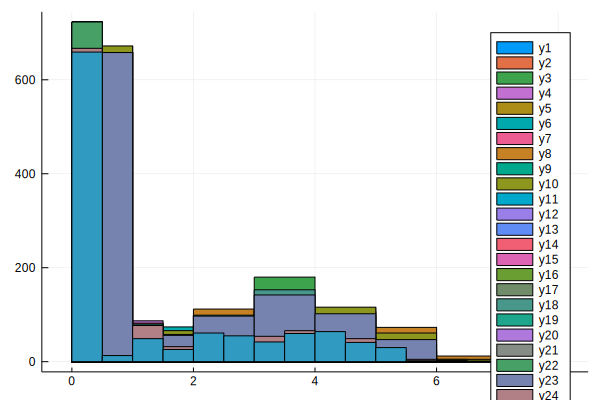

25×8 DataFrame. Omitted printing of 1 columns
│ Row │ variable │ mean    │ std     │ min     │ q25     │ median  │ q75     │
│     │ Symbol   │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ x1       │ 1.17538 │ 1.63181 │ 0.0     │ 0.0     │ 0.0     │ 2.56495 │
│ 2   │ x2       │ 1.05317 │ 1.58497 │ 0.0     │ 0.0     │ 0.0     │ 2.35024 │
│ 3   │ x3       │ 1.26843 │ 1.68151 │ 0.0     │ 0.0     │ 0.0     │ 2.99573 │
│ 4   │ x4       │ 1.12988 │ 1.5845  │ 0.0     │ 0.0     │ 0.0     │ 2.3979  │
│ 5   │ x5       │ 1.14855 │ 1.58716 │ 0.0     │ 0.0     │ 0.0     │ 2.3979  │
│ 6   │ x6       │ 1.41125 │ 1.97174 │ 0.0     │ 0.0     │ 0.0     │ 3.04452 │
│ 7   │ x7       │ 1.27281 │ 1.91749 │ 0.0     │ 0.0     │ 0.0     │ 2.8029  │
│ 8   │ x8       │ 1.49315 │ 1.99026 │ 0.0     │ 0.0     │ 0.0     │ 3.04452 │
│ 9   │ x9       │ 1.35359 │ 1.90964 │ 0.0     │ 0.0     │ 0.0     │ 2.99448 │
│ 10  │ x10      │ 1.37983 │ 1.91564 │ 0.0     │ 0.0     │ 0.0     │ 2.94444 │
⋮
│ 15  │ x15      │ 1.21421 │ 1.67928 │ 0.0     │ 0.0     │ 0.0     │ 2.56495 │
│ 16  │ x16      │ 1.27267 │ 1.77323 │ 0.0     │ 0.0     │ 0.0     │ 2.70805 │
│ 17  │ x17      │ 1.15038 │ 1.72668 │ 0.0     │ 0.0     │ 0.0     │ 2.52493 │
│ 18  │ x18      │ 1.35375 │ 1.80151 │ 0.0     │ 0.0     │ 0.0     │ 3.04452 │
│ 19  │ x19      │ 1.22853 │ 1.72591 │ 0.0     │ 0.0     │ 0.0     │ 2.63906 │
│ 20  │ x20      │ 1.24842 │ 1.72757 │ 0.0     │ 0.0     │ 0.0     │ 2.63906 │
│ 21  │ x21      │ 1.29686 │ 1.80454 │ 0.0     │ 0.0     │ 0.0     │ 2.77259 │
│ 22  │ x22      │ 1.17412 │ 1.75975 │ 0.0     │ 0.0     │ 0.0     │ 2.63906 │
│ 23  │ x23      │ 1.37248 │ 1.83246 │ 0.0     │ 0.0     │ 0.0     │ 3.04452 │
│ 24  │ x24      │ 1.2523  │ 1.75713 │ 0.0     │ 0.0     │ 0.0     │ 2.77259 │
│ 25  │ x25      │ 1.26795 │ 1.75555 │ 0.0     │ 0.0     │ 0.0     │ 2.70805 │

In [16]:
x_values = DataFrame([log.(col.+1) for col = eachcol(x_train[:, Not(:date)])])
display(histogram(convert(Matrix, x_values)))
display(describe(x_values, :mean, :std, :min, :q25, :median, :q75, :max))
x_train_log = log.(x_train[:, Not(:date)] .+ 1)
x_pred_log = log.(x_pred[:, Not(:date)] .+ 1);

# MULTICOLINEARITY

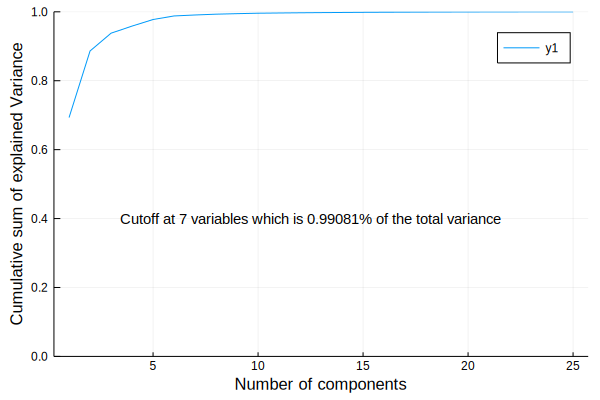

In [65]:
CUTOFF = 7

@sk_import decomposition : PCA
pca = PCA()
x_train_matrix = pca.fit_transform(toArray(x_train))
explained_variance = cumsum(pca.explained_variance_ratio_)
Plots.plot(
    1:length(explained_variance),
    explained_variance,
    ylims=(0, 1.0),
    xlabel="Number of components",
    ylabel="Cumulative sum of explained Variance"
)
display(
    annotate!([(12.5, .4, 
        text("Cutoff at $(CUTOFF) variables which is $(round(explained_variance[CUTOFF], digits=5))% of the total variance",10)
    )])
)

x_train_pca = DataFrame(
    date=x_train[!,:date],
    x₁=x_train_matrix[:,1],
    x₂=x_train_matrix[:,2],
    x₃=x_train_matrix[:,3],
    x₄=x_train_matrix[:,4],
    x₅=x_train_matrix[:,5],
    x₆=x_train_matrix[:,6],
    x₇=x_train_matrix[:,7],
);

# Data Split

Aiming for

- 80% TRAIN
- 20% TEST

**TODO: enable use of different datasets (PCA with and without log)**

In [28]:
Y = y_train
X = x_pred
X_PCA = x_train_pca

function dataSplit(ouvrage, X_train = X_PCA) #HERE
    y = getOuvrage(Y, ouvrage)
    y_train, y_test = splitdataframe(y, .80)

    x_train = getDataFromDates(X_train, y_train.date)
    y_train = getDataFromDates(y_train, x_train.date)

    x_test = getDataFromDates(X_train, y_test.date)
    y_test = getDataFromDates(y_test, x_test.date)
    
    return x_train, x_test, y_train, y_test
end

dataSplit (generic function with 2 methods)

# MODELS

In [29]:
@sk_import metrics: f1_score;

In [30]:
function train_on_all_ouvrages(model_contructor::Function)
    pred = []
    test = []
    for ouvrage in ouvrages
        x_train, x_test, y_train, y_test = dataSplit(ouvrage)
        
        model = model_contructor(x_train, y_train)
        
        prediction = model.predict(toArray(x_test));
        
        push!(test, toArray(y_test))
        push!(pred, prediction)
    end
    
    pred = collect(Iterators.flatten(pred))
    test = collect(Iterators.flatten(test))
    return f1_score(pred,test)
end

train_on_all_ouvrages (generic function with 1 method)

## Logistic Regression

In [31]:
@sk_import linear_model: LogisticRegression
function modeleLogistique(x_train, y_train) 
    model = LogisticRegression(
        penalty="l2",
        solver="liblinear",
        random_state=234,
    )
    model.fit(toArray(x_train), toArray(y_train));
    return model
end

modeleLogistique (generic function with 1 method)

## Modele de l'arbre de Decision

In [32]:
@sk_import tree: DecisionTreeClassifier
function modeleArbreDecisif(x_train, y_train)
    model = DecisionTreeClassifier(
        random_state=234,
    )
    model.fit(toArray(x_train), toArray(y_train));
    return model
end

modeleArbreDecisif (generic function with 1 method)

## Ridge Classifier

*TODO* explain but super ez to explain (Ridge that transforms {0,1} -> [-1, 1] )

In [189]:
@sk_import linear_model: RidgeClassifier
function ModeleClassificationRidge(x_train, y_train)
    model = RidgeClassifier(
        alpha=.5,
    )
    model.fit(toArray(x_train), toArray(y_train));
    return model
end

ModeleClassificationRidge (generic function with 1 method)

# Train All Models

In [190]:
Iterations=10
display("$(Iterations)  iterations")

models = [
    #modeleLogistique,
    #modeleArbreDecisif,
    ModeleClassificationRidge,
];

# TODO -> VALIDATE DATASETS
for m in models
    
    score=[]
    for i = 1:Iterations
        f1 = train_on_all_ouvrages(m);
        push!(score,f1)
    end
    f1 = mean(score)
    
    f1 = round(f1, digits=4)
    m = string(m)

    display("f1 = $(f1) with $(m)")
end

"10  iterations"

"f1 = 0.602 with ModeleClassificationRidge"

/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/williamglazer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d

Results show:

Logistic = .69

Trees = .61

## Mise en place des valeurs cherchees

In [ ]:
test = CSV.read("data/test.csv")
df = test[:, [:NO_OUVRAGE, :DATE]]
rename!(df, :DATE=>:date)
X = join(df, x_pred, on=:date)

In [ ]:
function predictLogit(df, modeles)
    dataframe = DataFrame(NO_OUVRAGE=df.NO_OUVRAGE, x₁=df.sumMcTavish,x₂=df.sumBellevue,x₃=df.sumAssomption,x₄=df.sumTrudeau,x₅=df.sumStHubert,x₆=df.maxMcTavish,x₇=df.maxBellevue,x₈=df.maxAssomption,x₉=df.maxTrudeau,x₁₀=df.maxStHubert)
    predictions = []
    for x in eachrow(dataframe)
        modele = filter(row -> row.NO_OUVRAGE == x.NO_OUVRAGE, modeles).modele[1]
        predictions = vcat(predictions, GLM.predict(modele, DataFrame(x[Not([:NO_OUVRAGE])])))
    end
    return round.(predictions)
end

In [ ]:
function predictTree(dataframe, modeles)
    predictions = []
    for x in eachrow(dataframe)
        modele = filter(row -> row.NO_OUVRAGE == x.NO_OUVRAGE, modeles).modele[1]
        predictions = vcat(predictions, modele.predict([toArray(x)]))
    end
    return round.(predictions)
end

In [ ]:
predictionsTree = predictTree(X, modelesTree)

In [ ]:
predictionsLogit = predictLogit(X, modelesLogit)

In [ ]:
#Nombre de diff entre Tree et Logit
sum(abs.(predictionsTree-predictionsLogit))

# Création du fichier de prédictions pour soumettre sur Kaggle

Dans ce cas-ci, nous prédirons une surverse avec une prediction logistique

In [ ]:
# Création du fichier sampleSubmission.csv pour soumettre sur Kaggle
ID = test[:,:NO_OUVRAGE].*"_".*string.(test[:,:DATE])
sampleSubmission = DataFrame(ID = ID, Surverse=predictionsTree)
CSV.write("sampleSubmission.csv",sampleSubmission)

# Vous pouvez par la suite déposer le fichier sampleSubmission.csv sur Kaggle.